In [1]:
from tensorflow.keras.datasets import cifar10

# tensorflow 라이브러리에 내장되어 있는 데이터 세트 호출 후 데이터 세트 분리
(train_images, train_targets), (test_images, test_targets) = cifar10.load_data()

# 데이터 형태 확인
# 타겟 데이터의 dimension은 1로 맞춰준다.
# one-hot encoding의 적용 여부를 판단하기 편하다.
print(train_images.shape, train_targets.squeeze().shape)
print(test_images.shape, test_targets.squeeze().shape)

(50000, 32, 32, 3) (50000,)
(10000, 32, 32, 3) (10000,)


```
print(train_images.shape, train_targets.shape)
print(test_images.shape, test_targets.shape)
```

(50000, 32, 32, 3) (50000, 1)  
(10000, 32, 32, 3) (10000, 1)

<br>

2차원인 target을 squeeze을 통해 1차원으로 수정

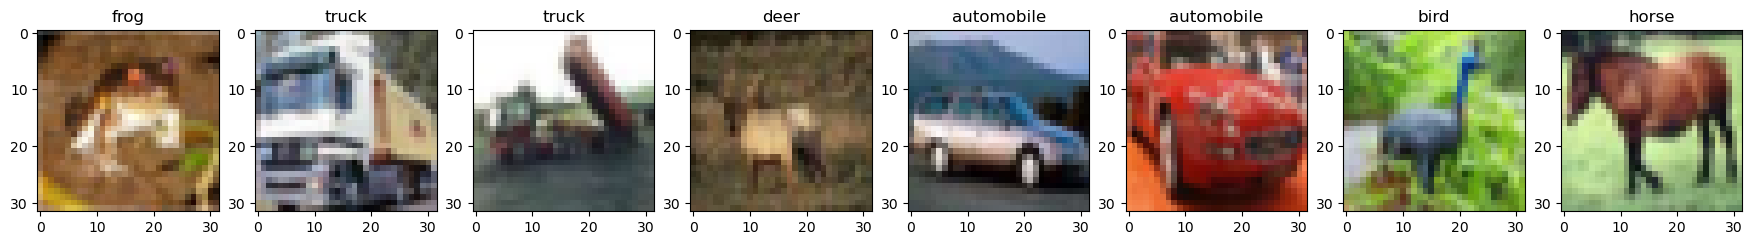

In [2]:
import matplotlib.pyplot as plt

# 클래스 이름 지정
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

# 이미지와 타겟(이름)을 보여주는 함수 선언
# ncols = 이미지 표시 시 한 행에 몇 개의 이미지를 보여줄지 개수 선택
def show_images(images, targets, ncols=8):
    # nrows = 이미지 표시 시 몇 개의 행으로 나눌것인지, 1로 설정 시 이미지가 한 줄에 표시
    fig, axes = plt.subplots(figsize=(22,6), nrows=1, ncols= ncols)
    for i in range(ncols):
        axes[i].imshow(images[i])
        target = targets[i].squeeze()
        axes[i].set_title(class_names[int(target)])

# 함수를 사용하여 이미지 출력 8번째까지 출력
show_images(train_images[:8], train_targets[:8])

In [3]:
import numpy as np

# 전처리 함수 선언
def get_preprocessed_data(images,targets):
    # 픽셀 범위를 0 또는 1로 이미지 정규화 후 형변환
    images = np.array(images / 255.0, dtype=np.float32)
    # 타겟 데이터 형변환
    targets = np.array(targets, dtype=np.float32)

    return images, targets

# 함수를 통해 형변환 진행
train_images, train_targets = get_preprocessed_data(train_images, train_targets)
test_images, test_targets = get_preprocessed_data(test_images, test_targets)

In [4]:
train_images[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [5]:
# 차원이 1인 축을 제거하여 타겟 배열을 평평하게 만듦
train_targets = train_targets.squeeze()
test_targets = test_targets.squeeze()

# 데이터 형태 확인
print(train_images.shape, train_targets.shape)
print(test_images.shape, test_targets.shape)

(50000, 32, 32, 3) (50000,)
(10000, 32, 32, 3) (10000,)


In [6]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Activation
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# 입력 데이터 크기 지정
IMAGE_SIZE = 32

# Input layer
# RGB 이기 때문에 채널 3으로 설정
input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

# Convolutional Layer 1
# padding='valid' = 디폴트 값, 즉 변화가 있음
# 필터 사이즈를 너무 낮추게 되면 성능이 떨어질 수 있음(실습 시 최솟값은 32 정도로 고정)
# 해상도가 높다면 최소 64 ~ 512 정도로 두기
x = Conv2D(filters=32, kernel_size=5, padding='valid', activation='relu')(input_tensor)
x = Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPooling2D(2)(x)

# Convolutional Layer 2
x = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
x = Conv2D(filters=64, kernel_size=3, padding='same')(x)
# Activation도 정확히 층으로 구분하기 위해 별도로 사용이 가능, 하지만 위처럼 쓰는거랑 동일함
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

# Convolutional Layer 3
x = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(x)
x = Conv2D(filters=128, kernel_size=3, padding='same')(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)
# 이렇게 점점 필터의 개수가 늘어나는게 normal한 방식

# Flatten Layer: 2D 텐서를 1D로 평탄화
# name이라는 속성을 줄 수 있는데, summary에 나오는 layer 이름이 변경됨
x = Flatten(name='classifierA00')(x)
# Dropout을 통해 모델 일반화하여 과적합 방지 (비활성화)
x = Dropout(name='classifierA_DroupOut01', rate=0.5)(x)
# Dense Layer (은닉층)
x = Dense(300, activation='relu', name='classifierAD01')(x)
# Dropout을 통해 모델 일반화하여 과적합 방지 (비활성화)
x = Dropout(name='classifierA_DroupOut02', rate=0.3)(x)

# Dense Layer (출력층)
output = Dense(10, activation='softmax', name='output')(x)

# 인공 신경망 생성
model = Model(inputs=input_tensor, outputs=output)
# 모델 구조 확인
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ classifierA00 (Flatten)              │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ classifierA_DroupOut01 (Dropout)     │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ classifierAD01 (Dense)               │ (None, 300)                 │         345,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ classifierA_DroupOut02 (Dropout)     │ (None, 300)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │           3,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 637,454 (2.43 MB)

 Trainable params: 637,454 (2.43 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

# CategoricalCrossentropy 하려면 원-핫해야 하는데 SparseCategoricalCrossentropy을 하면 자동으로 원-핫 인코딩이됨
# SparseCategoricalCrossentropy 사용 시 원-핫 인코딩 안 된걸 사용해야 함

# 모델 컴파일
model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['acc'])

In [8]:
# 훈련
# validation_split 사용 시 validation 직접 안나눠도 됨. 자동으로 나눠짐
history = model.fit(x=train_images, y=train_targets, batch_size=128, epochs=30, validation_split=0.2)

Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 88ms/step - acc: 0.2614 - loss: 1.9725 - val_acc: 0.4641 - val_loss: 1.4513
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 82ms/step - acc: 0.4686 - loss: 1.4464 - val_acc: 0.5493 - val_loss: 1.2355
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 83ms/step - acc: 0.5606 - loss: 1.2230 - val_acc: 0.6165 - val_loss: 1.0711
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 95ms/step - acc: 0.6139 - loss: 1.0839 - val_acc: 0.6699 - val_loss: 0.9372
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 90ms/step - acc: 0.6646 - loss: 0.9536 - val_acc: 0.7008 - val_loss: 0.8581
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 88ms/step - acc: 0.6967 - loss: 0.8582 - val_acc: 0.7147 - val_loss: 0.8098
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 94ms/step - acc: 0.7219 - loss: 0.7922 - val_acc: 0.7341 - val_loss: 0.7671
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 96ms/step - acc: 0.7515 - loss: 0.7067 - val_acc: 0.7299 - val_loss: 0.7960
Epoch 9/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 

In [9]:
# 테스트 데이터 세트로 모델 성능 검증
model.evaluate(test_images, test_targets, batch_size=256, verbose=1)

40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - acc: 0.7867 - loss: 0.7978


[0.8078867197036743, 0.7807999849319458]

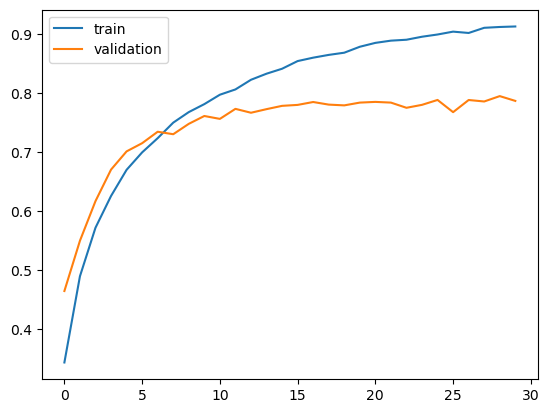

In [10]:
import matplotlib.pyplot as plt

# 학습과정 지표를 그래프화
def show_history(history):
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    
show_history(history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
[3 1 0 9 4 7 9 8]


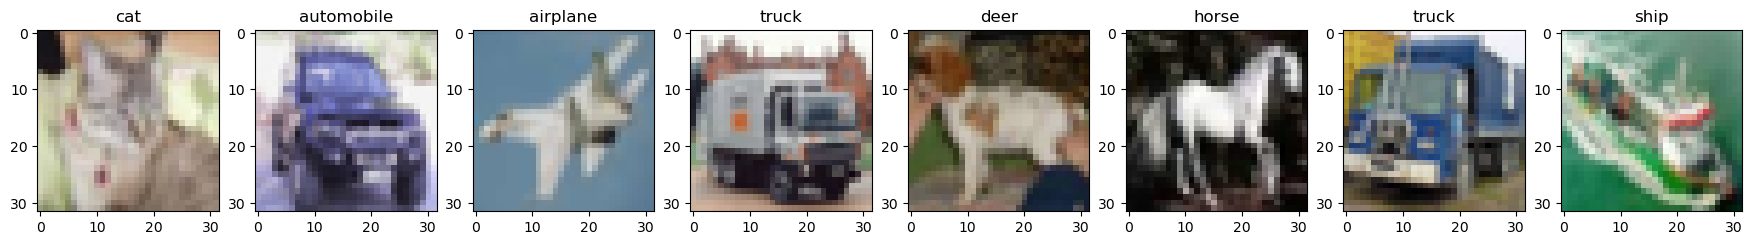

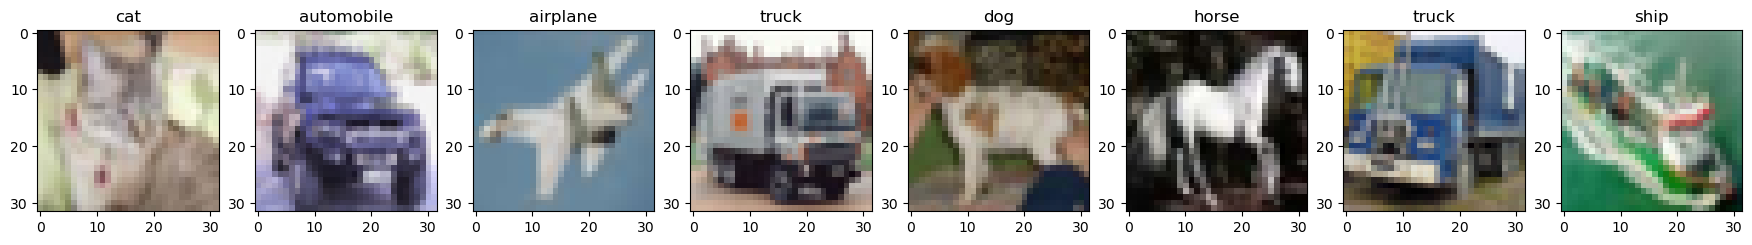

In [11]:
# 예측
pred_prob = model.predict(test_images[8:16], batch_size=128)
# argmax를 통해 각 예측 확률 배열에서 가장 높은 확률을 가진 클래스의 인덱스를 추출
pred_classes = np.argmax(pred_prob.squeeze(), axis=1)
print(pred_classes)

# 함수를 사용하여 이미지 출력 8번째까지, 8번째부터 16번째까지 출력
show_images(test_images[8:16], pred_classes)
show_images(test_images[8:16], test_targets[8:16])